# Forecast Exchange Rates

## Importing Library

In [1]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plotly
from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#datetime
import datetime as dt

#warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
inrusd = pd.read_csv('Dataset.csv',parse_dates=["observation_date"])
inrusd.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


### Copy Data

In [3]:
#Copy Data
df = inrusd.copy()
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### Shape

In [4]:
df.shape

(12649, 2)

#### Renaming 

In [5]:
#renaming the date and rate
data = df[['observation_date', 'DEXINUS']]
data.columns = ['date', 'rate']

In [6]:
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Converting rates to numeric

In [8]:
data['rate'] = pd.to_numeric(data.rate)

Sorting Date in Ascending order

In [9]:
data = data.sort_values('date', ascending=True)

#### Descriptive Stats

In [10]:
data.rate.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: rate, dtype: float64

#### Checking Null Values

In [11]:
data.isnull().sum()

date      0
rate    494
dtype: int64

Forward Filling Null Values

In [12]:
#Forward Filling
data.fillna(method='ffill', inplace=True)

In [13]:
data.isnull().sum()

date    0
rate    0
dtype: int64

Convert datatype int to float

In [14]:
#transformation of values to float
data['rate'] = pd.to_numeric(data['rate'], downcast="float")

#### info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


#### Checking Duplicates

In [16]:
data.duplicated().sum()

0

No Duplicates found

### Final Data

In [17]:
final_data = data.copy()

In [18]:
final_data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [19]:
data1 = data.copy()

In [20]:
#data1 = data.set_index('date')

In [21]:
data1.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [22]:
final_data1 = data1.copy()

### Segregating Years, Months, Day

In [23]:
#copy data 
df1 = final_data.copy()

In [24]:
#if date is not set to index then use 
#Years
df1['Year']= [i.year for i in df1['date']]
#Months
df1['Month']= [i.month for i in df1['date']]
#Days
df1['Day']= [i.day for i in df1['date']]

In [25]:
#Date is set to index
#Years
#df1['Year']= df1.index.year
#Months
#df1['Month']= df1.index.month
#Days
#df1['Day']= df1.index.day

In [26]:
df1.head()

,date,rate,Year,Month,Day
0,1973-01-02,8.02,1973,1,2
1,1973-01-03,8.02,1973,1,3
2,1973-01-04,8.00,1973,1,4
3,1973-01-05,8.01,1973,1,5
4,1973-01-08,8.00,1973,1,8


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
 2   Year    12649 non-null  int64         
 3   Month   12649 non-null  int64         
 4   Day     12649 non-null  int64         
dtypes: datetime64[ns](1), float32(1), int64(3)
memory usage: 543.5 KB


## Visialization

### Line Plot

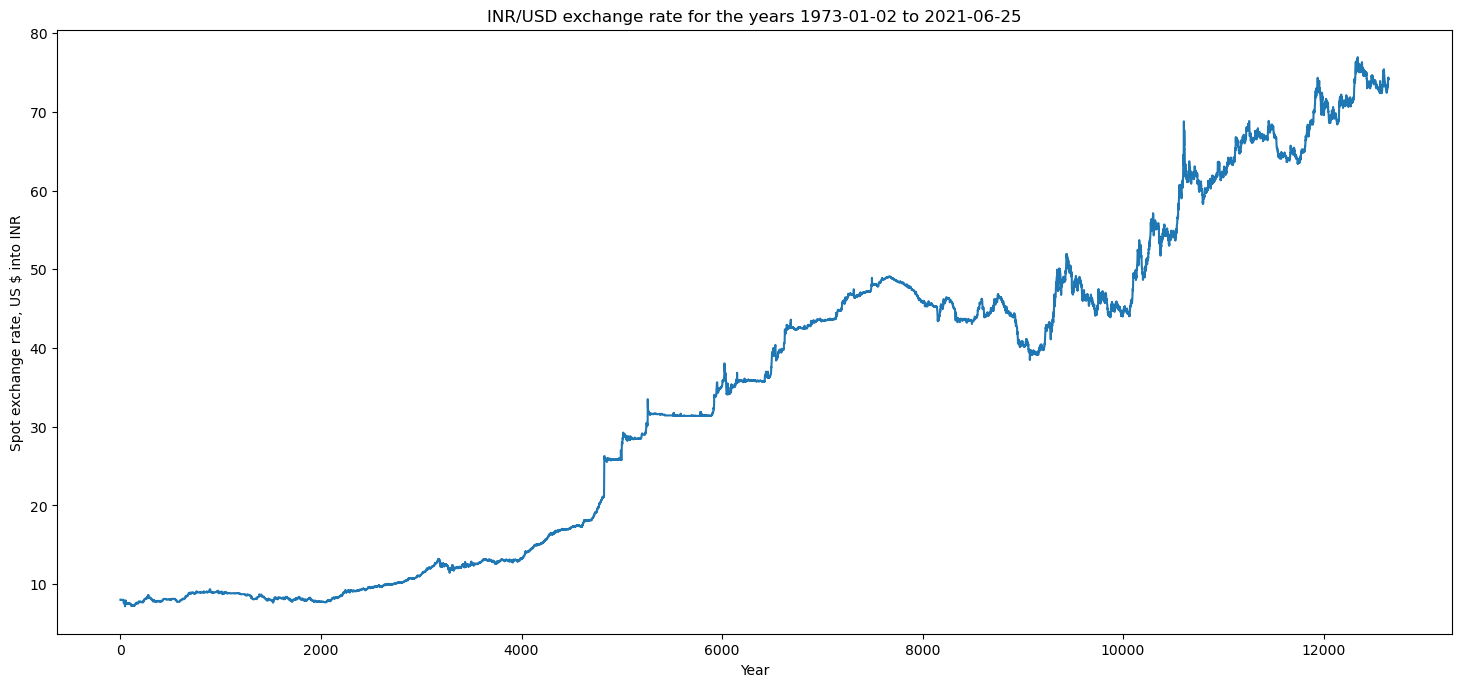

In [28]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
df1.rate.plot()
plt.ylabel('Spot exchange rate, US \$ into INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

### Line Plot on 10 years interval

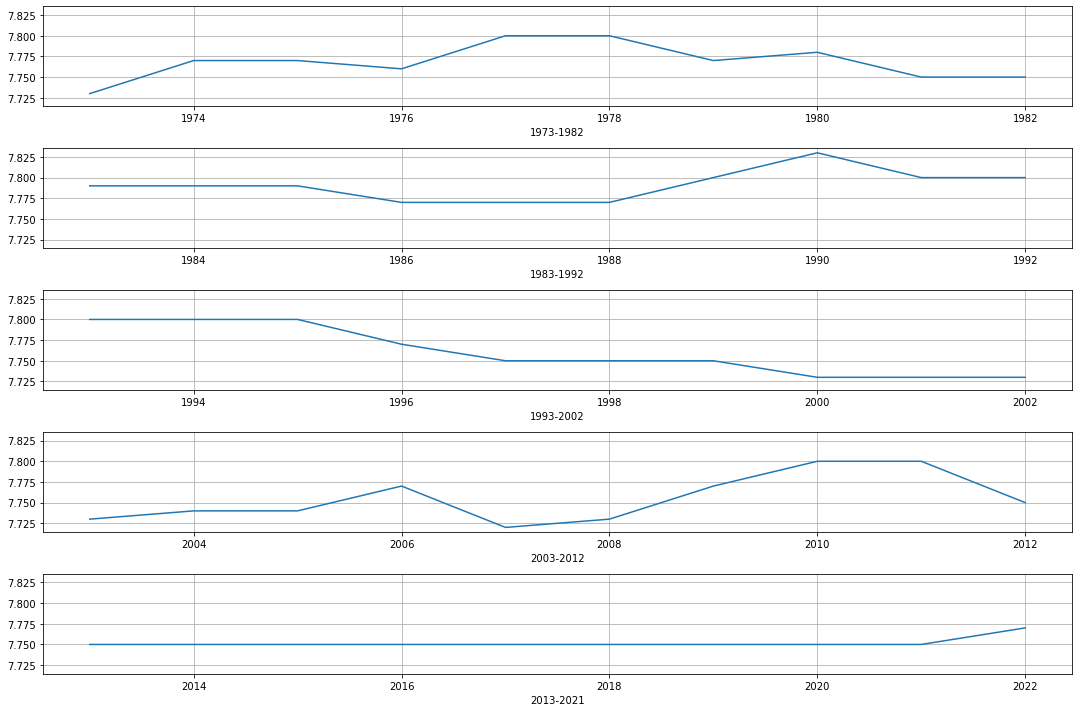

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharey=True)
df1.loc['1973':'1982']['rate'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1983':'1992']['rate'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1993':'2002']['rate'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
df1.loc['2003':'2012']['rate'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
df1.loc['2013':'2022']['rate'].plot(xlabel="2013-2021",
                                                ax=ax[4],
                                                grid=True)
plt.tight_layout()
plt.show()

### Box Plot

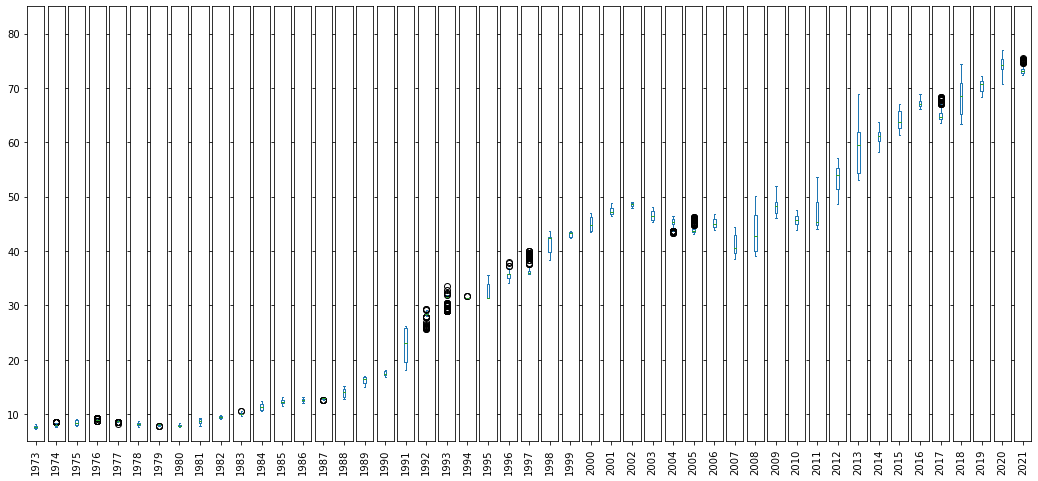

In [30]:
box1 = df1.groupby('Year')

years = list(np.unique(df1.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='rate',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

### Box Plot with 5 years interval

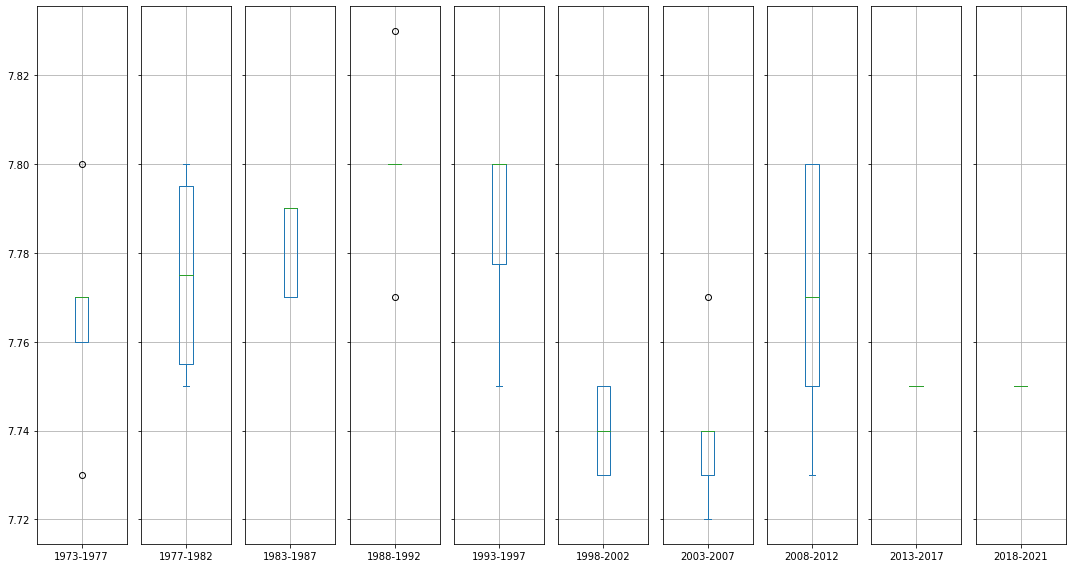

In [31]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
df1.loc['1973':'1977']['rate'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1977':'1982']['rate'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1983':'1987']['rate'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
df1.loc['1988':'1992']['rate'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
df1.loc['1992':'1997']['rate'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
df1.loc['1997':'2002']['rate'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
df1.loc['2003':'2007']['rate'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
df1.loc['2008':'2012']['rate'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
df1.loc['2013':'2017']['rate'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
df1.loc['2018':'2021']['rate'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
plt.show()